# Sheet 1: Principal Component Analysis

In [2]:
%matplotlib inline

import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# set printing of matrices to 3 decimal places for clarity
# this doesn't change the values stored inside the matrices
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

## Question 2

In [5]:
data_matrix = np.array([[10, 60, 10, 90],
                        [20, 50, 40, 70],
                        [30, 50, 30, 40],
                        [20, 50, 20, 60],
                        [10, 60, 30, 10]])

In [6]:
norm = linalg.norm(data_matrix, axis=1)
print norm

[109.087 96.954 76.811 83.066 68.557]


In [22]:
cosine_sim = cosine_similarity(data_matrix)
#plt.imshow(cosine_similarity)
#plt.show()
print cosine_sim

[[1.000 0.990 0.898 0.982 0.687]
 [0.990 1.000 0.945 0.997 0.716]
 [0.898 0.945 1.000 0.965 0.849]
 [0.982 0.997 0.965 1.000 0.765]
 [0.687 0.716 0.849 0.765 1.000]]


In [8]:
euclidean_distances(data_matrix)

array([[0.000, 38.730, 58.310, 34.641, 82.462],
       [38.730, 0.000, 33.166, 22.361, 62.450],
       [58.310, 33.166, 0.000, 24.495, 37.417],
       [34.641, 22.361, 24.495, 0.000, 52.915],
       [82.462, 62.450, 37.417, 52.915, 0.000]])

## Question 3

In [9]:
data_matrix = np.array([[10, 60, 90],
                        [20, 50, 70],
                        [30, 50, 40],
                        [20, 50, 60],
                       [10, 60, 10]])

### Scatter Plot

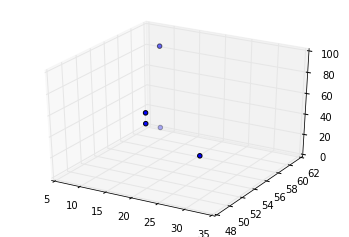

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_matrix[:,0], data_matrix[:,1], data_matrix[:,2], marker='o')

### Mean Vector and data centering

In [11]:
mean = np.mean(data_matrix, axis=0)
print mean

[18.000 54.000 54.000]


In [23]:
centered_data = np.empty([5,3])
for i in range(0,3):
    centered_data[:,i] = data_matrix[:,i] - mean[i]
print centered_data

[[-8.000 6.000 36.000]
 [2.000 -4.000 16.000]
 [12.000 -4.000 -14.000]
 [2.000 -4.000 6.000]
 [-8.000 6.000 -44.000]]


### covariance matrix

In [13]:
# rowvar=False means that columns are variables (and rows are instances)
covariance = np.cov(centered_data, rowvar=False)
print covariance

[[70.000 -40.000 -15.000]
 [-40.000 30.000 -20.000]
 [-15.000 -20.000 930.000]]


### eigen values and eigen vectors

In [14]:
eigenvalues, eigenvectors = linalg.eigh(covariance)

In [29]:
for i in range(0,3):
    print "{}, {}".format(eigenvalues[i], eigenvectors[:,i])

4.60865706553, [0.526 0.850 0.027]
94.7153745646, [0.850 -0.526 0.003]
930.67596837, [-0.016 -0.021 1.000]


In [16]:
# verify that (eigenvec * (eigenvals * eigenvec.transpose)) = Covariance
np.matmul(eigenvectors, np.matmul(np.diag(eigenvalues),eigenvectors.transpose()))
print eigenvectors.transpose()

[[0.526 0.850 0.027]
 [0.850 -0.526 0.003]
 [-0.016 -0.021 1.000]]


### variance and projection to lower dimensions

The variance by the eigenvector of the largest eigenvalue corresponds to $\frac{930.7}{930.7 + 94.7 + 4.6} = 0.903$ of the total variance which is good enough to represent the original dataset.

In [36]:
# compute the projection matrix
# (column vectors corresponding to the eigenvectors of the highest eigenvalues)
proj_matrix = np.column_stack((eigenvectors[:,2], eigenvectors[:,1]))


The projection matrix $P$ corresponding to the top two eigen vectors of the martix $U$ is
$$ P = \begin{bmatrix} 
-0.016 & 0.850 \\
-0.021 & -0.526 \\
1.000 & 0.003 \\
\end{bmatrix}
$$

The projected data is just transforming the original dataset to the new subspace by applying the projection matrix on the dataset.

In [41]:
# computing the projected data
proj_data = data_matrix.dot(proj_matrix)
print proj_data

[[88.515 -22.839]
 [68.573 -9.126]
 [38.419 -0.704]
 [58.576 -9.153]
 [8.544 -23.052]]


$$ ProjData = \begin{bmatrix} 
88.515 & -22.839 \\
68.573 & -9.126 \\
38.419 & -0.704 \\
58.576 & -9.153 \\
8.544 & -23.052
\end{bmatrix}
$$

### Plotting the new projected data

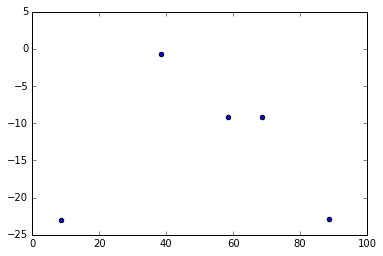

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(proj_data[:,0], proj_data[:,1], marker='o')